<a href="https://colab.research.google.com/github/ORIE5355/project_competition_public/blob/main/run_gym_headtohead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import time
from IPython import display

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import make_env

In [32]:
project_part = 2 #TODO Change this for whether you're coding for part 1 or part 2!
#agentnames = ['glowing_guacamole', 'dummy_fixed_prices_adaptive']
agentnames = ['glowing_guacamole', 'dummy_fixed_prices_adaptive']

In [33]:
if project_part == 1:
    env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part)
    
else:
    env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part
    , first_file = 'data/datafile1.csv', second_file='data/datafile2.csv')

# you can replace the agentnames to match whatever agentfiles you create. 
# you can use the same agentnames for both agents

In [34]:
T = 500
import time

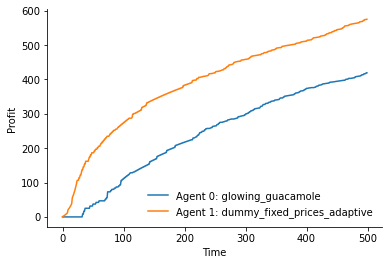

last customer covariate:  [3.04696606 4.68886735 2.47499103]
last (item bought, agent bought from, prices):  (0, 1, [[0.6066702388204086, 2.610472121642338], [0.5878912851251404, 2.52966720991562]])
current_profit per agent:  [419.52796718941, 575.3584602266852]
Cumulative buyer utility: 5303.903439956034
Average per-customer runtime agent 0 in seconds: 0.14784755849838258
Average per-customer runtime agent 1 in seconds: 5.827426910400391e-06


In [35]:
env.reset()
customer_covariates, sale, profits = env.get_current_state_customer_to_send_agents()
last_customer_covariates = customer_covariates
cumulativetimes = [0 for _ in agents]

fig, ax = plt.subplots(figsize=(20, 10))
for t in range(0, T):
    actions = []
    for enoutside, agent in enumerate(agents):
      ts = time.time()
      action = agent.action((customer_covariates, sale, profits))
      assert len(action) == project_part ## Have to give 1 price for each item. There is 1 item in part 1, 2 items in part 2
      curtime = time.time()
      cumulativetimes[enoutside] += curtime - ts
      actions.append(action)
    customer_covariates, sale, profits = env.step(actions)
    newplot = env.render(True)
    if newplot:
      display.clear_output(wait=True)
      display.display(plt.gcf())
    print('last customer covariate: ', last_customer_covariates)
    print('last (item bought, agent bought from, prices): ', sale)
    print('current_profit per agent: ', profits)
    last_customer_covariates = customer_covariates
    
plt.close()
print("Cumulative buyer utility: {}".format(env.cumulative_buyer_utility))
print("Average per-customer runtime agent 0 in seconds: {}".format(cumulativetimes[0]/T))
print("Average per-customer runtime agent 1 in seconds: {}".format(cumulativetimes[1]/T))

In [36]:
agents[0].agent_history

[[23.189042374975376, 100.41622340241136],
 [23.189042374975376, 100.41622340241136],
 [102.51287628044668, 25.23769432221391],
 [102.51287628044668, 25.23769432221391],
 [102.51287628044668, 25.23769432221391],
 [102.51287628044668, 25.23769432221391],
 [102.51287628044668, 25.742248208658186],
 [102.51287628044668, 25.742248208658186],
 [102.51287628044668, 28.769571527323855],
 [102.51287628044668, 28.769571527323855],
 [24.219222036085394, 100.41622340241136],
 [24.219222036085394, 100.41622340241136],
 [29.885210172190487, 100.41622340241136],
 [29.885210172190487, 100.41622340241136],
 [102.51287628044668, 28.769571527323855],
 [102.51287628044668, 28.769571527323855],
 [102.51287628044668, 27.25590986799102],
 [102.51287628044668, 27.25590986799102],
 [102.51287628044668, 31.796894845989524],
 [102.51287628044668, 31.796894845989524],
 [21.64377288331035, 100.41622340241136],
 [21.64377288331035, 100.41622340241136],
 [26.794671188860434, 100.41622340241136],
 [26.79467118886043

In [37]:
print(len(agents[0].behavior_history))
print(len(agents[0].price_history0))
print(len(agents[0].oppo_rev_history))

0
500


AttributeError: 'Agent' object has no attribute 'oppo_rev_history'

In [ ]:
agents[0].price_history0

In [ ]:
agents[0].is_normal

In [ ]:
for i in range(len(agents[0].max_rev)):
    print(agents[0].oppo_rev_history[i] / agents[0].max_rev[i])

In [ ]:
agents[0].max_rev